In [28]:
# Importar los módulos necesarios
import numpy as np
import sympy as sp
import heapq as he
import math as mt
from math import pi,cos,sin
import pandas as pd
from openpyxl import load_workbook
import matplotlib.pyplot as plt

In [2]:
"PRIMER EJERCICIO"

# Datos y valores iniciales
"Factor de carga de la distribución de correas y los materiales"
Codigo = "2200277"
X = sum([int(i) for i in Codigo])

"Factor de amplitud debido a carga viva y de viento"
Y = X/3

"Carga distribuida en kN/m"
w = 0.005*X + 0.01*Y

"Carga aplicada en kN y ángulo de aplicación en radianes"
P = 0.05*X
Ang = pi/4

"Longitudes de la viga en metros"
L1 = 0.05*X
L2 = L1*1.5
L3 = 0.5*L1
L4 = L1 + L2 + L3 

"Esfuerzo admisible en MPa"
Esf_Ad = 250

In [3]:
# Puntualización de cargas

"Primera carga triángular puntualizada en kN y posición en metros"
wt_1 = (L1*w)/2
Posi_1 = L1 - L1/3

"Carga cuadrada puntualizada en kN y posición en metros"
wc = L2*w
Posi_2 = L1 + L2/2 

"Segunda carga triángular puntualizada en kN y posición en metros"
wt_2 = (L3*w)/2
Posi_3 = L1 + L2 + L3/3 

# Definición de simbolos
Ay, Ma, x = sp.symbols("Ay Ma x")

# Calcula de  reacciones
Sum_M = Ma - Posi_1*wt_1 - Posi_2*wc - Posi_3*wt_2 + L4*P*sin(Ang)
Ecu_M = sp.Eq (Sum_M,0)
Momento = sp.solve(Ecu_M)

Fy = Ay -wt_1 - wc -wt_2 + P*sin(Ang)
Ecu_Fy = sp.Eq(Fy,0)
Reaccion = sp.solve(Ecu_Fy)


In [4]:
print(f"Ma = {Momento[0]} kN-m")

Ma = -1.63935724127451 kN-m


In [5]:
print(f"Ay = {Reaccion[0]} kN")

Ay = -0.329024620245875 kN


In [6]:
# Funciones para la carga
"Tramo 1"
w1 = ((w-0)/(L1-0))*x 

"Tramo 3"
w3 = ((0-w)/(L3-0))*x + w

In [7]:
w1

0.166666666666667*x

In [8]:
w3

0.175 - 0.333333333333333*x

In [9]:
# Cálculo de fuerzas internas
"Tramo 1(0 <= x <= L1)"
v1 = -sp.integrate(w1,x) + Reaccion[0]
v1_L1 = v1.subs(x,L1)

M1 = sp.integrate(v1,x)- Momento[0]
M1_0 = M1.subs(x,0)
M1_L1 = M1.subs(x,L1)

In [10]:
v1

-0.0833333333333333*x**2 - 0.329024620245875

In [11]:
M1

-0.0277777777777778*x**3 - 0.329024620245875*x + 1.63935724127451

In [12]:
"Tramo 2(0 <= x <= L2)"
v2 = -sp.integrate(w,x) + v1_L1
v2_L2 = v2.subs(x,L2)

M2 = sp.integrate(v2,x) + M1_L1
M2_L2 = M2.subs(x,L2)

In [13]:
v2

-0.175*x - 0.420899620245875

In [14]:
M2

-0.0875*x**2 - 0.420899620245875*x + 1.26172514001634

In [15]:
"Tramo 3(0 <= x <= L3)"
v3 = -sp.integrate(w3,x) + v2_L2
v3_L3 = v3.subs(x,L3)

M3 = sp.integrate(v3,x) + M2_L2
M3_L3 = M3.subs(x,L3)

In [16]:
v3

0.166666666666667*x**2 - 0.175*x - 0.696524620245875

In [17]:
M3

0.0555555555555556*x**3 - 0.0875*x**2 - 0.696524620245875*x + 0.381753550629088

La fuerza cortante máxima se da a una distancia de 3.15 m desde el empotramiento y tiene un valor de -0.7425 kN.


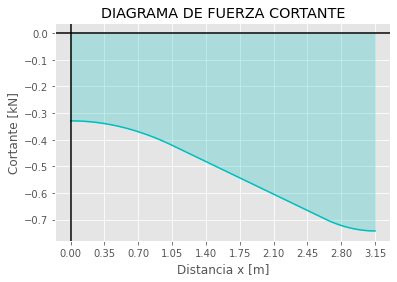

In [18]:
# Diagrama de fuerza cortante
plt.style.use('ggplot')
L = np.linspace(0,L4,2000)
Tramo1 = sp.lambdify(x, v1)(L[L < L1])
Tramo2 = sp.lambdify(x, v2)(L[(L >= L1) & (L < L1+L2)] - L1) 
Tramo3 = sp.lambdify(x, v3)(L[(L >= L1+L2) & (L <= L4)] - L1 - L2)
plt.plot(L, np.concatenate((Tramo1, Tramo2, Tramo3)), color = "c")
plt.fill_between(L, np.concatenate((Tramo1, Tramo2, Tramo3)), color = "c", alpha=0.25)
plt.xticks(np.linspace(0,3.15,10))

plt.axvline(0, color="red")
plt.axhline(0, color="red")
plt.xlabel("Distancia x [m]")
plt.ylabel("Cortante [kN]")
plt.title("DIAGRAMA DE FUERZA CORTANTE")

print(f"La fuerza cortante máxima se da a una distancia de {L4} m medidos desde el empotramiento y tiene un valor de {round(v3_L3,4)} kN.")

El momento flector máximo se da en el empotramiento y tiene un valor de 1.6394 kN-m.


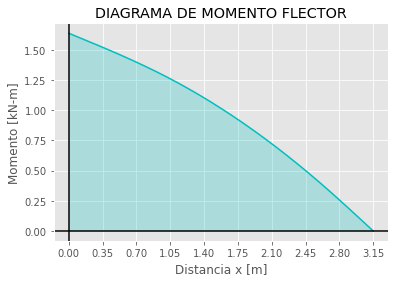

In [19]:
# Diagrama de momento flector
plt.style.use('ggplot')
L = np.linspace(0,L4,2000)
Tramo1 = sp.lambdify(x, M1)(L[L < L1])
Tramo2 = sp.lambdify(x, M2)(L[(L >= L1) & (L < L1+L2)] - L1) 
Tramo3 = sp.lambdify(x, M3)(L[(L >= L1+L2) & (L <= L4)] - L1 - L2)
plt.plot(L, np.concatenate((Tramo1, Tramo2, Tramo3)), color = "c")
plt.fill_between(L, np.concatenate((Tramo1, Tramo2, Tramo3)), color = "c", alpha=0.25)
plt.xticks(np.linspace(0,3.15,10))

plt.axvline(0, color="red")
plt.axhline(0, color="red")
plt.xlabel("Distancia x [m]")
plt.ylabel("Momento [kN-m]")
plt.title("DIAGRAMA DE MOMENTO FLECTOR")

print(f"El momento flector máximo se da en el empotramiento y tiene un valor de {round(M1_0,4)} kN-m.")

In [96]:
"SEGUNDO EJERCICIO"

#Importación de la tabla necesario de excel
Perfiles = pd.read_excel("Taller2.xlsx", usecols ="B:E", skiprows = 3, nrows = 10, index_col="perfil")

Perfiles

,h [mm],b [mm],t [mm]
perfil,,,
1,25,50,5.0
2,30,60,5.5
3,35,70,6.0
4,40,80,7.0
5,50,100,8.5
6,55,115,9.0
7,60,120,10.0
8,70,140,11.5
9,80,160,13.0


In [104]:
# Cambio de orden de las columnas h y b para luego exportar en el orden que se pide
Perfiles = Perfiles[["b [mm]","h [mm]","t [mm]"]]

In [105]:
# Cálculo de áreas

Area_F1 = Perfiles["b [mm]"]*Perfiles["t [mm]"]
Area_F2 = (Perfiles["h [mm]"] - Perfiles["t [mm]"])*Perfiles["t [mm]"]
Perfiles["A [mm^2]"] = Area_F1 + Area_F2

Perfiles

,b [mm],h [mm],t [mm],A [mm^2]
perfil,,,,
1,50,25,5.0,350.00
2,60,30,5.5,464.75
3,70,35,6.0,594.00
4,80,40,7.0,791.00
5,100,50,8.5,1202.75
6,115,55,9.0,1449.00
7,120,60,10.0,1700.00
8,140,70,11.5,2282.75
9,160,80,13.0,2951.00


In [106]:
# Cálculo de centroide (Eje Neutro)

"El nivel de referencia se encontrará en la base de la viga"
y1 = Perfiles["h [mm]"]-(Perfiles["t [mm]"]/2)
M_Area1 = Area_F1*y1

y2 = (Perfiles["h [mm]"]-Perfiles["t [mm]"])/2
M_Area2 = Area_F2*y2

EN = (M_Area1 + M_Area2)/Perfiles["A [mm^2]"]

In [107]:
# Cálculo de inercias alrededor del eje z

I_F1 = (Perfiles["b [mm]"]*(Perfiles["t [mm]"])**3)/12
Steiner_F1 = Area_F1*(y1-EN)**2

I_F2 = (Perfiles["t [mm]"]*(Perfiles["h [mm]"] - Perfiles["t [mm]"])**3)/12
Steiner_F2 = Area_F2*(y2-EN)**2

Iz = I_F1 + Steiner_F1 + I_F2 + Steiner_F2
Perfiles["Iz [mm ^ 4]"] = Iz
Perfiles["Eje neutro [mm]"] = EN

Perfiles

,b [mm],h [mm],t [mm],A [mm^2],Iz [mm ^ 4],Eje neutro [mm]
perfil,,,,,,
1,50,25,5.0,350.00,1.501488e+04,18.928571
2,60,30,5.5,464.75,2.910029e+04,22.900888
3,70,35,6.0,594.00,5.113253e+04,26.873737
4,80,40,7.0,791.00,8.866585e+04,30.659292
5,100,50,8.5,1202.75,2.115530e+05,38.417845
6,115,55,9.0,1449.00,3.036222e+05,42.642857
7,120,60,10.0,1700.00,4.318137e+05,46.176471
8,140,70,11.5,2282.75,7.908459e+05,53.935139
9,160,80,13.0,2951.00,1.337393e+06,61.693833


In [108]:
# Cálculo de los esfuerzos

"Como el momento máximo es positivo, la fibra superior de la viga trabaja a compresión, mientras que la inferior a tracción"
Esf_Inferior = ((M1_0*10**6)*Perfiles["Eje neutro [mm]"])/Perfiles["Iz [mm ^ 4]"]
Perfiles["Esfuerzo Inf [MPa]"] = Esf_Inferior

Esf_Superior = ((M1_0*10**6)*(Perfiles["h [mm]"]-Perfiles["Eje neutro [mm]"]))/Perfiles["Iz [mm ^ 4]"]
Perfiles["Esfuerzo Sup [MPa]"] = -Esf_Superior

Perfiles

,b [mm],h [mm],t [mm],A [mm^2],Iz [mm ^ 4],Eje neutro [mm],Esfuerzo Inf [MPa],Esfuerzo Sup [MPa]
perfil,,,,,,,,
1,50,25,5.0,350.00,1.501488e+04,18.928571,2066.66244886142,-662.891728880080
2,60,30,5.5,464.75,2.910029e+04,22.900888,1290.11557697298,-399.926661965851
3,70,35,6.0,594.00,5.113253e+04,26.873737,861.597415630630,-260.535659039595
4,80,40,7.0,791.00,8.866585e+04,30.659292,566.864635613530,-172.701868347548
5,100,50,8.5,1202.75,2.115530e+05,38.417845,297.705897470614,-89.7519377713264
6,115,55,9.0,1449.00,3.036222e+05,42.642857,230.242984800043,-66.7203289286556
7,120,60,10.0,1700.00,4.318137e+05,46.176471,175.306450366737,-52.4802749505519
8,140,70,11.5,2282.75,7.908459e+05,53.935139,111.803023382003,-33.3011118576782
9,160,80,13.0,2951.00,1.337393e+06,61.693833,75.6234164932470,-22.4394378405290


In [109]:
# Se determina el perfil que cumpla con las solicitaciones(esfuerzo admisible) y que sea el más económico (mínima área de sección tranversal)

"Definir un filtro para encontrar los perfiles cuyos esfuerzos sean menores al admisible"
Filtro = (Perfiles["Esfuerzo Inf [MPa]"] <= Esf_Ad) & (Perfiles["Esfuerzo Sup [MPa]"] <= Esf_Ad )

Posibles_Perf = Perfiles[Filtro]
Posibles_Perf


,b [mm],h [mm],t [mm],A [mm^2],Iz [mm ^ 4],Eje neutro [mm],Esfuerzo Inf [MPa],Esfuerzo Sup [MPa]
perfil,,,,,,,,
6,115,55,9.0,1449.00,3.036222e+05,42.642857,230.242984800043,-66.7203289286556
7,120,60,10.0,1700.00,4.318137e+05,46.176471,175.306450366737,-52.4802749505519
8,140,70,11.5,2282.75,7.908459e+05,53.935139,111.803023382003,-33.3011118576782
9,160,80,13.0,2951.00,1.337393e+06,61.693833,75.6234164932470,-22.4394378405290
10,180,90,15.0,3825.00,2.186057e+06,69.264706,51.9426519605147,-15.5497110964598


In [110]:
"Determinar el perfil con la menor área dentro de la variable Posibles_Perf"
Perf = Posibles_Perf["A [mm^2]"].idxmin()
Perf

6

In [111]:
print(f"El perfil más adecuado, que cumple con las solicitaciones y resulta más económico, es el perfil {Perf}.")
Perfil = Posibles_Perf.loc[[Perf],["b [mm]","h [mm]","t [mm]","A [mm^2]","Esfuerzo Inf [MPa]","Esfuerzo Sup [MPa]"]]
Perfil

El perfil adecuado, que cumple con las solicitaciones y resulta más económico, es el perfil 6.


,b [mm],h [mm],t [mm],A [mm^2],Esfuerzo Inf [MPa],Esfuerzo Sup [MPa]
perfil,,,,,,
6,115,55,9.0,1449.0,230.242984800043,-66.7203289286556


In [113]:
# se exporta las tablas al Excel

with pd.ExcelWriter('Taller2.xlsx', mode='a',if_sheet_exists="overlay", engine='openpyxl') as writer:  
    # configurando sheets
    book = load_workbook('Taller2.xlsx')
    # colocar el book dentro del writer de pandas
    writer.book = book
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
    Perfiles.to_excel(writer, startrow=3, startcol=6, sheet_name='Perfiles')
    Perfil.to_excel(writer, startrow=18, startcol=6, sheet_name='Perfiles', index = None)
    